In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime as dt
from datetime import timedelta as td

pd.set_option('display.max_columns',None)

# Reading the data


In [31]:
# Reading the datasets

train = pd.read_csv('Hotel-A-train.csv')
test = pd.read_csv('Hotel-A-test.csv')
validation = pd.read_csv('Hotel-A-validation.csv')

# Data Cleaning


In [6]:
columns = list(train.columns)

In [19]:
# Checking for null values
null_columns = [col for col in columns if len(train[train[col].isnull()])]
number_null_columns=len(null_columns) 
print(number_null_columns)

0


In [21]:
#checking for duplications
number_data_before_removing_duplicates = len(train)
number_data_before_removing_duplicates = len(train.drop_duplicates())
number_duplicates = number_data_before_removing_duplicates - number_data_before_removing_duplicates
print(number_duplicates)

0


In [22]:
train

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,8/31/2016,9/1/2016,7/25/2016,1,2,1,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,10,100
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,4/26/2016,2,1,0,BB,No,No,Refundable,Agent,Yes,No-Show,Yes,40,194
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,9/1/2016,9/2/2016,8/23/2016,2,1,1,HB,No,No,No Deposit,Direct,Yes,Check-In,Yes,5,202
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,5/25/2016,3,2,0,FB,No,No,No Deposit,Online,No,Canceled,Yes,20,157


# Data Transformation

In [6]:
# < Label Encoding and Dummy Encoding >

#Gender
G = {'F':1,'M':0}
train = train.replace({"Gender": G})

#Ethnicity
E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
train = pd.concat([train,pd.get_dummies(train.Ethnicity,prefix='Eth_')],axis=1)

#Educational_Level
EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
train = pd.concat([train,pd.get_dummies(train.Educational_Level,prefix='Ed_L_')],axis=1)

#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
train = train.replace({"Income": I})

#Country_region
CR = {'South':1,'East':2,'West':3,'North':4}
train = pd.concat([train,pd.get_dummies(train.Country_region,prefix='Country_R_')],axis=1)

#Hotel_Type
HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
train = pd.concat([train,pd.get_dummies(train.Hotel_Type,prefix='Hotel_T_')],axis=1)

#Meal_Type
MT = {'HB':1,'FB':2,'BB':3}
train = pd.concat([train,pd.get_dummies(train.Meal_Type,prefix='Meal_T_')],axis=1)

#Visted_Previously
VP = {'Yes':1,'No':0}
train = train.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
train = train.replace({"Previous_Cancellations": VP})

#Deposit_type
DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
train = pd.concat([train,pd.get_dummies(train.Deposit_type,prefix='Deposit_T_')],axis=1)

#Booking_channel
BC = {'Direct':1,'Online':2,'Agent':3}
train = pd.concat([train,pd.get_dummies(train.Booking_channel,prefix='Booking_C_')],axis=1)

#Required_Car_Parking
#VP = {'Yes':1,'No':0}
train = train.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
train = train.replace({"Use_Promotion": VP})


#Prediction Target -> Reservation_Status
RS = {'Check-In':1,'Canceled':2,'No-Show':3}
train = train.replace({"Reservation_Status": RS})

In [7]:
# Groping the age 

def Age_group(x):
    if x<=30:
        return 0
    elif x<=45:
        return 1
    elif x<=60:
        return 2
    else:
        return 3
    
train['Age'] = train['Age'].apply(lambda x:Age_group(x))

# Remove categorical data columns
train = train.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)

In [14]:
# Date formatting
train["Expected_checkin"]=train["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train["Expected_checkout"]=train["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train["Booking_date"]=train["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

# Data Analysis

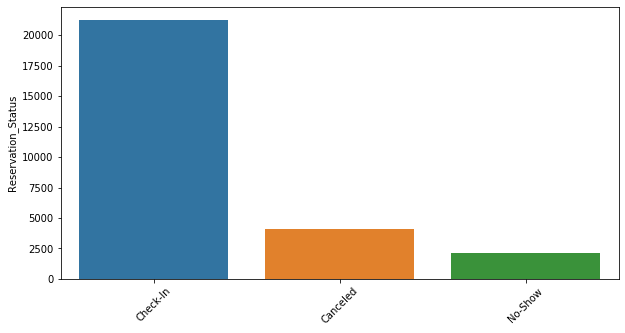

In [21]:
cat_num = train['Reservation_Status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

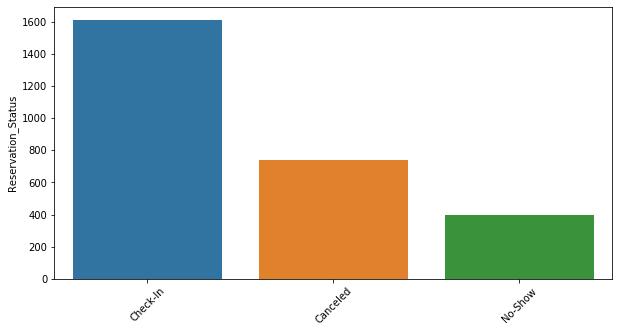

In [19]:
cat_num = validation['Reservation_Status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [15]:
# Extracting the Year Month Date
train['Booking_date_Year']=train["Booking_date"].apply(lambda x:x.year)
train['Booking_date_month']=train["Booking_date"].apply(lambda x:x.month)
train['Booking_date_day']=train["Booking_date"].apply(lambda x:x.day)

train['Ex_checkin_Year']=train["Expected_checkin"].apply(lambda x:x.year)
train['Ex_checkin_month']=train["Expected_checkin"].apply(lambda x:x.month)
train['Ex_checkin_day']=train["Expected_checkin"].apply(lambda x:x.day)

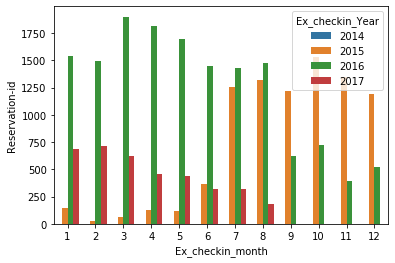

In [16]:
# No of expected checkins vs month and year
t=train.groupby(['Ex_checkin_Year','Ex_checkin_month'])[['Reservation-id']].count().reset_index()
plot = sn.barplot(x=t['Ex_checkin_month'], y=t["Reservation-id"],hue=t['Ex_checkin_Year'])
plt.show()

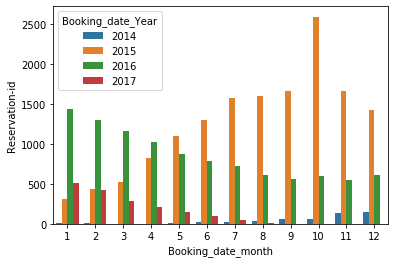

In [17]:
#No of reservations vs month and year
t=train.groupby(['Booking_date_Year','Booking_date_month'])[['Reservation-id']].count().reset_index()
plot = sn.barplot(x=t['Booking_date_month'], y=t["Reservation-id"],hue=t['Booking_date_Year'])
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


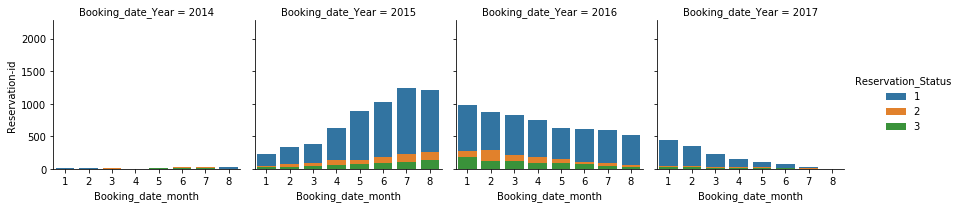

In [18]:
# Behaviour of reservations bookings vs reservation status vs month and year
t=train.groupby(['Booking_date_Year','Booking_date_month',"Reservation_Status"])[['Reservation-id']].count().reset_index()
g = sn.FacetGrid(t, col="Booking_date_Year",hue='Reservation_Status')
g.map(sn.barplot,'Booking_date_month','Reservation-id')
g.add_legend()

# Feature Selection

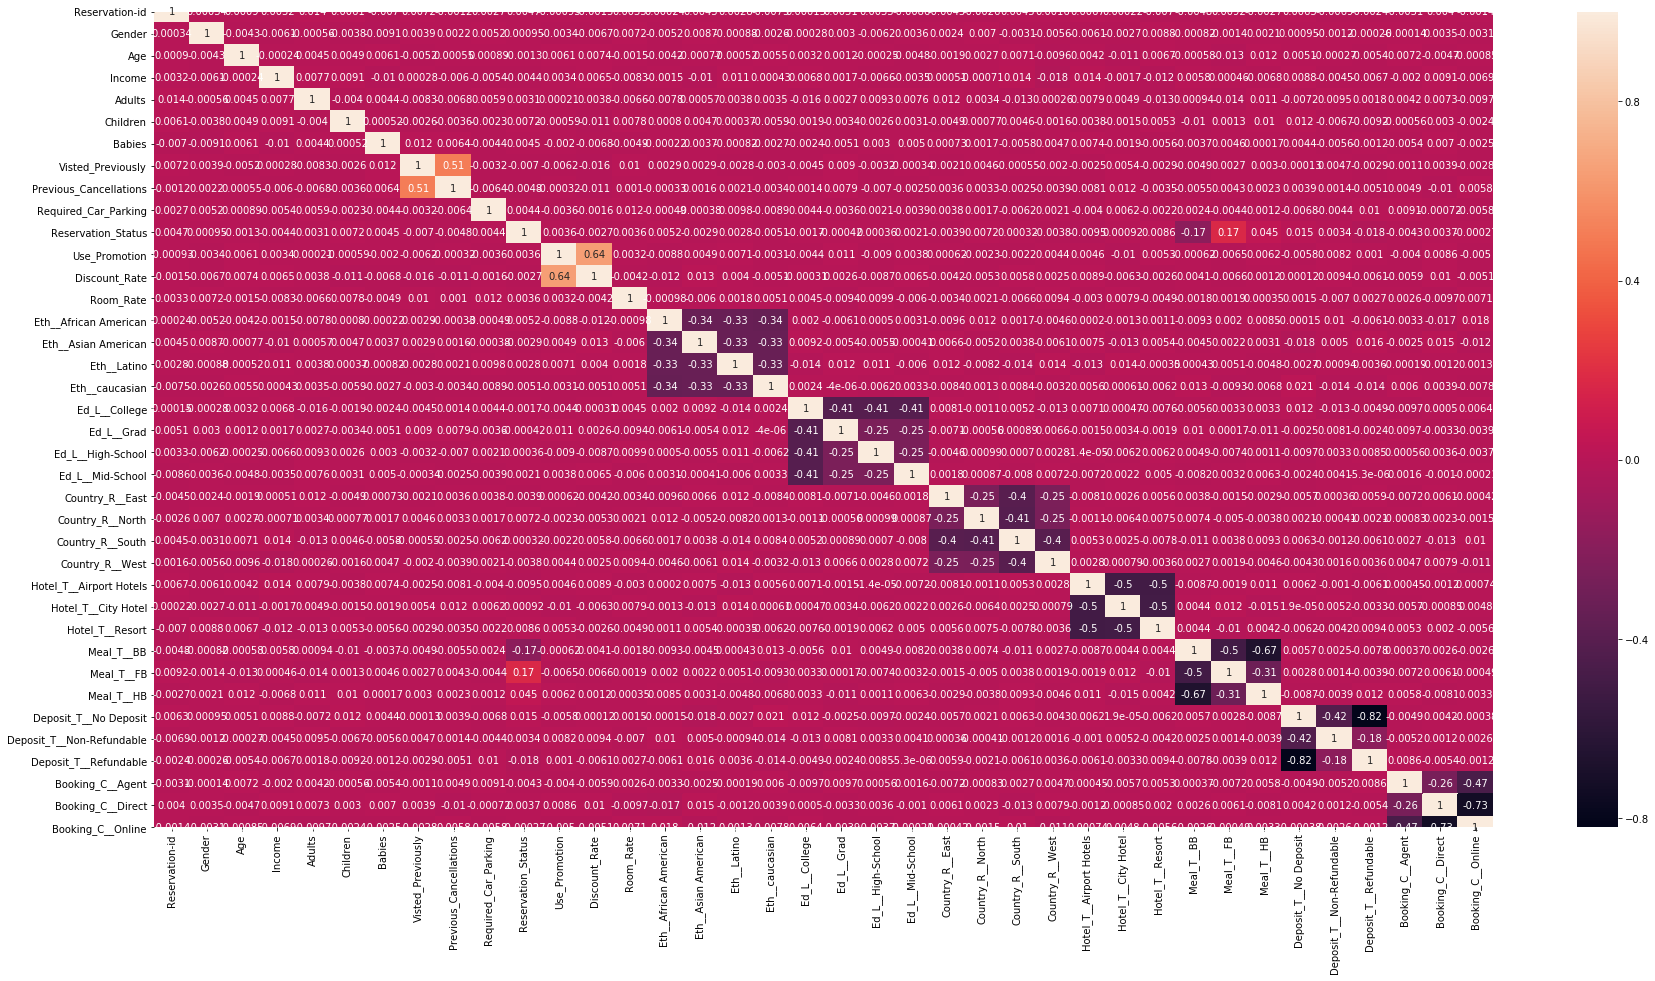

In [9]:
# Correlation matrix
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
# Correlation Values
corrMatrix.Reservation_Status.sort_values()

AttributeError: 'DataFrame' object has no attribute 'Reservation_Status'

In [53]:
# Calculating the No of reservation days
train["Expected_Checking_days"]=train["Expected_checkout"]-train["Expected_checkin"]
train["Expected_Checking_days"]=train["Expected_Checking_days"].apply(lambda x:x.days)

In [54]:
del train['Ex_checkin_Year']
del train['Ex_checkin_month']
del train['Ex_checkin_day']

del train['Booking_date_Year']
del train['Booking_date_month']
del train['Booking_date_day']

In [58]:
# Extracing a new feature - weekday or weekend
def week_end_day(num):
    week_end=[4,5,6]
    if num in week_end:
        return 1
    else:
        return 0

train['week_end/day']=train["Expected_checkin"].apply(lambda x:x.to_pydatetime().weekday())
train['week_end/day']=train['week_end/day'].apply(lambda x :week_end_day(x))

In [60]:
train

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,week_end/day
0,39428300,1,1,1,2015-07-01,2015-07-02,2015-05-21,2,2,0,0,0,1,1,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0
1,77491756,1,2,3,2015-07-01,2015-07-02,2015-05-26,3,3,0,0,0,1,1,0,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
2,73747291,1,1,1,2015-07-02,2015-07-06,2015-06-29,3,3,0,0,0,1,1,0,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,4,0
3,67301739,0,0,4,2015-07-02,2015-07-03,2015-06-20,4,3,0,0,0,1,1,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
4,77222321,1,3,2,2015-07-03,2015-07-04,2015-06-20,1,1,0,0,0,0,1,1,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,1,2,1,2016-08-31,2016-09-01,2016-07-25,1,2,1,1,1,1,1,1,10,100,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0
27495,56414525,1,2,2,2016-08-31,2016-09-01,2016-04-26,2,1,0,0,0,1,3,1,40,194,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
27496,52023375,1,2,3,2016-09-01,2016-09-02,2016-08-23,2,1,1,0,0,1,1,1,5,202,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
27497,98041387,0,3,2,2016-08-31,2016-09-01,2016-05-25,3,2,0,0,0,0,2,1,20,157,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0


In [69]:
# moving column to the last
train = train[[c for c in train if c not in ['Reservation_Status']] + ['Reservation_Status']]

In [70]:
# Extracting the top features
corrMatrix = train.corr()
feature_columns=corrMatrix[(corrMatrix.Reservation_Status>=0.004) | (corrMatrix.Reservation_Status<=-0.004)].Reservation_Status.reset_index()
print(feature_columns)

                      index  Reservation_Status
0            Reservation-id            0.004722
1                    Income           -0.004443
2                  Children            0.007180
3                    Babies            0.004473
4         Visted_Previously           -0.007038
5    Previous_Cancellations           -0.004780
6      Required_Car_Parking            0.004444
7     Eth__African American            0.005178
8            Eth__caucasian           -0.005080
9          Country_R__North            0.007173
10  Hotel_T__Airport Hotels           -0.009484
11          Hotel_T__Resort            0.008606
12               Meal_T__BB           -0.173065
13               Meal_T__FB            0.168576
14               Meal_T__HB            0.044998
15    Deposit_T__No Deposit            0.014708
16    Deposit_T__Refundable           -0.018121
17         Booking_C__Agent           -0.004327
18             week_end/day            0.033491
19       Reservation_Status            1

# Preprocessing Validation dataset & Tests dataset

In [62]:
# < Label Encoding and Dummy Encoding >

#Gender
G = {'F':1,'M':0}
test = test.replace({"Gender": G})

#Ethnicity
E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
test = pd.concat([test,pd.get_dummies(test.Ethnicity,prefix='Eth_')],axis=1)

#Educational_Level
EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
test = pd.concat([test,pd.get_dummies(test.Educational_Level,prefix='Ed_L_')],axis=1)

#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
test = test.replace({"Income": I})

#Country_region
CR = {'South':1,'East':2,'West':3,'North':4}
test = pd.concat([test,pd.get_dummies(test.Country_region,prefix='Country_R_')],axis=1)

#Hotel_Type
HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
test = pd.concat([test,pd.get_dummies(test.Hotel_Type,prefix='Hotel_T_')],axis=1)

#Meal_Type
MT = {'HB':1,'FB':2,'BB':3}
test = pd.concat([test,pd.get_dummies(test.Meal_Type,prefix='Meal_T_')],axis=1)

#Visted_Previously
VP = {'Yes':1,'No':0}
test = test.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
test = test.replace({"Previous_Cancellations": VP})

#Deposit_type
DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
test = pd.concat([test,pd.get_dummies(test.Deposit_type,prefix='Deposit_T_')],axis=1)

#Booking_channel
BC = {'Direct':1,'Online':2,'Agent':3}
test = pd.concat([test,pd.get_dummies(test.Booking_channel,prefix='Booking_C_')],axis=1)

#Required_Car_Parking
#VP = {'Yes':1,'No':0}
test = test.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
test = test.replace({"Use_Promotion": VP})

# only to run for the validation set
#Prediction Target -> Reservation_Status
#RS = {'Check-In':1,'Canceled':2,'No-Show':3}
#validation = validation.replace({"Reservation_Status": RS})

In [29]:
# < Label Encoding and Dummy Encoding >

#Gender
G = {'F':1,'M':0}
validation = validation.replace({"Gender": G})

#Ethnicity
E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
validation = pd.concat([validation,pd.get_dummies(validation.Ethnicity,prefix='Eth_')],axis=1)

#Educational_Level
EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
validation = pd.concat([validation,pd.get_dummies(validation.Educational_Level,prefix='Ed_L_')],axis=1)

#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
validation = validation.replace({"Income": I})

#Country_region
CR = {'South':1,'East':2,'West':3,'North':4}
validation = pd.concat([validation,pd.get_dummies(validation.Country_region,prefix='Country_R_')],axis=1)

#Hotel_Type
HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
validation = pd.concat([validation,pd.get_dummies(validation.Hotel_Type,prefix='Hotel_T_')],axis=1)

#Meal_Type
MT = {'HB':1,'FB':2,'BB':3}
validation = pd.concat([validation,pd.get_dummies(validation.Meal_Type,prefix='Meal_T_')],axis=1)

#Visted_Previously
VP = {'Yes':1,'No':0}
validation = validation.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Previous_Cancellations": VP})

#Deposit_type
DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
validation = pd.concat([validation,pd.get_dummies(validation.Deposit_type,prefix='Deposit_T_')],axis=1)

#Booking_channel
BC = {'Direct':1,'Online':2,'Agent':3}
validation = pd.concat([validation,pd.get_dummies(validation.Booking_channel,prefix='Booking_C_')],axis=1)

#Required_Car_Parking
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Use_Promotion": VP})

# only to run for the validation set
#Prediction Target -> Reservation_Status
RS = {'Check-In':1,'Canceled':2,'No-Show':3}
validation = validation.replace({"Reservation_Status": RS})

In [82]:
#test = test.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)
validation = validation.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)

In [83]:
#test["Expected_checkin"]=test["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
#validation["Expected_checkin"]=validation["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

In [65]:
def week_end_day(num):
    week_end=[4,5,6]
    if num in week_end:
        return 1
    else:
        return 0

test['week_end/day']=test["Expected_checkin"].apply(lambda x:x.to_pydatetime().weekday())
test['week_end/day']=test['week_end/day'].apply(lambda x :week_end_day(x))

In [84]:
def week_end_day(num):
    week_end=[4,5,6]
    if num in week_end:
        return 1
    else:
        return 0

validation['week_end/day']=validation["Expected_checkin"].apply(lambda x:x.to_pydatetime().weekday())
validation['week_end/day']=validation['week_end/day'].apply(lambda x :week_end_day(x))

In [85]:
validation

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,week_end/day
0,45716350,0,56,1,2016-08-31,9/2/2016,2/18/2016,2,2,0,0,0,0,3,1,15,192,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0
1,88857401,0,60,2,2016-08-31,9/4/2016,3/9/2016,2,2,0,1,0,1,2,0,0,187,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,16074440,1,58,1,2016-09-01,9/2/2016,2/21/2016,3,1,0,0,0,0,2,1,10,227,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,10992124,1,23,2,2016-08-31,9/2/2016,5/20/2016,1,2,0,1,0,0,1,1,25,189,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
4,15934351,1,47,2,2016-08-31,9/1/2016,5/31/2016,1,1,0,1,0,1,1,1,10,218,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,1,22,3,2016-11-18,11/21/2016,10/12/2016,5,1,1,1,0,0,1,1,10,199,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1
2745,52215692,1,35,2,2016-12-09,12/10/2016,7/8/2016,3,2,0,0,0,1,2,1,5,106,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1
2746,31908733,0,18,2,2016-11-18,11/20/2016,10/19/2016,2,3,0,0,0,0,3,1,20,136,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
2747,41776403,0,42,1,2016-11-18,11/19/2016,6/1/2016,5,1,0,1,1,1,1,1,20,226,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1


In [86]:
feature_column_names = list(feature_columns['index'])
final_train=train[feature_column_names]
final_validation=validation[feature_column_names]
final_test=validation[feature_column_names[0:19]]

# Writing dataset

In [88]:
final_train.to_csv('Final_train.csv',header=True,index=False)
final_test.to_csv('Final_test.csv',header=True,index=False)
final_validation.to_csv('Final_validation.csv',header=True,index=False)